## Credit Risk Assessment with Exploratory Data Analysis

### Business Objectives:
- Identify patterns indicating clients' difficulty with loan payments.
- Use findings for actions like loan denial, reduced loan amounts, or higher interest rates for risky applicants.
- Ensure deserving loan applicants are not rejected.
- Understand key driver variables for loan default.
- Enhance portfolio management and risk assessment.
- Research on risk analytics for deeper domain understanding recommended.

### Importing Libraries

In [78]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [79]:
import warnings 
warnings.filterwarnings('ignore')

### Read Data Sets

In [80]:
appdata = pd.read_csv('application_data.csv')

In [81]:
prevapp = pd.read_csv('previous_application.csv')

In [82]:
coldesc = pd.read_csv('columns_description.csv', encoding='cp1252')

### Understanding Data

In [83]:
appdata.shape

(307511, 122)

In [84]:
appdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [85]:
prevapp.shape

(1670214, 37)

In [86]:
prevapp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [87]:
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
prevapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for missing values

In [89]:
pd.set_option('display.max_rows',500)

In [90]:
appdata.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [91]:
#calculate the percentage of missing values  
missing_values_percent = (appdata.isnull().sum()/len(appdata)*100).sort_values(ascending=False)
missing_values_percent 

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [92]:
cols_top_drop =  missing_values_percent[missing_values_percent >= 40]
cols_top_drop

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [93]:
len(cols_top_drop)

49

In [94]:
appdata1 = appdata.drop(columns=cols_top_drop.index)

In [95]:
appdata1.shape

(307511, 73)

In [96]:
missing_values_percent1 = (appdata1.isnull().sum()/len(appdata1)*100).sort_values(ascending=False)
missing_values_percent1 

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [97]:
appdata1.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [98]:
# there is a nan in occupation type , which probablys is not entered or just missing
# OCCUPATION_TYPE has 31.35% missing values, which is high. Imputing with mode might be risky so lets impute it with a category called notknown

In [99]:
appdata1['OCCUPATION_TYPE'] = appdata1['OCCUPATION_TYPE'].cat.add_categories('Notknown')
appdata1['OCCUPATION_TYPE'].fillna('Notknown', inplace =True) 

AttributeError: Can only use .cat accessor with a 'category' dtype

In [100]:
# OCCUPATION_TYPE is an object, hence the above cmd failed
##convert the OCCUPATION_TYPE object data type to category.
appdata1.OCCUPATION_TYPE = appdata1.OCCUPATION_TYPE.astype('category')

In [101]:
# re running the code to impute nan in OCCUPATION_TYPE column
appdata1['OCCUPATION_TYPE'] = appdata1['OCCUPATION_TYPE'].cat.add_categories('Notknown')
appdata1['OCCUPATION_TYPE'].fillna('Notknown', inplace =True) 

In [102]:
appdata1.OCCUPATION_TYPE.value_counts(normalize=True)

Notknown                 0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [103]:
# lets check the unique values in the entire dataframe to understand which are categorical and which are continuous
## categorical can be imputed with mode and continuous can be imputed with median 

In [104]:
## create a dataframe with dtype columns
cols_unique_values = pd.DataFrame(appdata1.nunique()).reset_index()
cols_unique_values.columns = ['Column','No. of Unique Values']

## extract the unique classes in each column
cols_unique_values['Unique Values'] = cols_unique_values['Column'].apply(lambda x: appdata1[x].unique())
cols_unique_values.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
36,REG_CITY_NOT_LIVE_CITY,2,"[0, 1]"
26,FLAG_EMAIL,2,"[0, 1]"
54,FLAG_DOCUMENT_9,2,"[0, 1]"
33,REG_REGION_NOT_LIVE_REGION,2,"[0, 1]"
34,REG_REGION_NOT_WORK_REGION,2,"[0, 1]"
35,LIVE_REGION_NOT_WORK_REGION,2,"[0, 1]"
37,REG_CITY_NOT_WORK_CITY,2,"[0, 1]"
38,LIVE_CITY_NOT_WORK_CITY,2,"[0, 1]"
61,FLAG_DOCUMENT_16,2,"[0, 1]"
60,FLAG_DOCUMENT_15,2,"[0, 1]"


In [105]:
# its clear that all the columns upto organization type are categorical

In [106]:
#lets go back and check the remaining columns for missing values after dropping the columns with > 40% missing values 

In [107]:
missing_values_percent2 = (appdata1.isnull().sum()/len(appdata1)*100).sort_values(ascending=False)
missing_values_percent2 

EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4 

In [108]:
cols_low_drop = missing_values_percent2[(missing_values_percent1 !=0)]
cols_low_drop

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
OCCUPATION_TYPE                0.000000
dtype: float64

In [109]:
#looking at the missing values% and the unique values for each column, we can find out which hold categorical and continuous values
# the categorical can be imputed with mode and the continous with median.

In [110]:
cat = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','NAME_TYPE_SUITE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS']
cont = ['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE']

In [111]:
for i in cont:
    if appdata1[i].isnull().mean()>0:
        imp_val=appdata1[i].median()
        appdata1[i]=appdata1[i].fillna(imp_val)

In [112]:
for i in cat:
    if appdata1[i].isnull().mean()>0:
        imp_val=appdata1[i].mode()[0]
        appdata1[i]=appdata1[i].fillna(imp_val)

In [113]:
#check if there are any more missing values
appdata1.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

In [114]:
appdata1.shape

(307511, 73)

In [115]:
# There are some columns which seem to be useless for analysis of the dataset.
# Identify them by looking at the data dictionary

In [116]:
no_use_cols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19' , 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [117]:
appdata1.drop(no_use_cols,axis=1, inplace=True)

In [118]:
appdata1.shape

(307511, 53)

In [119]:
appdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [120]:
appdata1.nunique().sort_values(ascending=True)

FLAG_EMAIL                          2
REG_REGION_NOT_LIVE_REGION          2
FLAG_PHONE                          2
FLAG_CONT_MOBILE                    2
FLAG_WORK_PHONE                     2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_OWN_CAR                        2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_REALTY                     2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CRED

In [121]:
appdata1.nunique().sort_values().index

Index(['FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'FLAG_OWN_CAR', 'TARGET',
       'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_

In [122]:
# CNT_CHILDREN and 'CNT_FAM_MEMBERS' will be kept as integer 
cols_cat_change = ['FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_PHONE','FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_OWN_CAR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON', 'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'ORGANIZATION_TYPE']

In [123]:
for i in cols_cat_change:
    appdata1[i] = appdata1[i].astype('category')

In [124]:
appdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [125]:
#lets do a sanity check at high level
appdata1.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152664,5.145034e-01,0.515695,-962.858119
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910679,1.908699e-01,0.174736,826.807226
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,8.173617e-08,0.000527,-4292.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,3.929737e-01,0.417100,-1570.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,5.659614e-01,0.535276,-757.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,6.634218e-01,0.636376,-274.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,8.549997e-01,0.896010,0.000000


In [126]:
# check for duplicates
appdata1.duplicated().sum()

0

In [127]:
# there are not duplicates

In [128]:
# columns with Days are in negative!
# make DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE as positive

In [129]:
cols_neg_values = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [130]:
appdata1[cols_neg_values] = appdata1[cols_neg_values].abs()

In [131]:
#check if the values are positive now
appdata1.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,2.152664,5.145034e-01,0.515695,962.858119
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.910679,1.908699e-01,0.174736,826.807226
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,1.000000,8.173617e-08,0.000527,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,2.000000,3.929737e-01,0.417100,274.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,2.000000,5.659614e-01,0.535276,757.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,3.000000,6.634218e-01,0.636376,1570.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,20.000000,8.549997e-01,0.896010,4292.000000


In [132]:
# the days columns are cumbersome as they are in days and it would easy for sanity checks and future analysis if we convert them into years. 

In [133]:
# we will use the cols_neg_values for this.
appdata1[cols_neg_values] = appdata1[cols_neg_values]/365

In [134]:
appdata1[cols_neg_values].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294,2.637967
std,11.956133,382.037676,9.651743,4.135481,2.265225
min,20.517808,0.000000,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329,0.750685
50%,43.150685,6.079452,12.339726,8.915068,2.073973
75%,53.923288,15.635616,20.491781,11.778082,4.301370
max,69.120548,1000.665753,67.594521,19.717808,11.758904


In [135]:
# columns can be renamed
appdata1.rename(columns={'DAYS_BIRTH': 'YEARS_BIRTH', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED','DAYS_REGISTRATION': 'YEARS_REGISTRATION','DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE': 'YEARS_LAST_PHONE_CHANGE'}, inplace=True)

In [136]:
#lets check if the changes have happened. 
appdata1.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,43.936973,185.547239,13.660604,8.203294,2.152664,5.145034e-01,0.515695,2.637967
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,11.956133,382.037676,9.651743,4.135481,0.910679,1.908699e-01,0.174736,2.265225
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,0.000000,1.000000,8.173617e-08,0.000527,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,4.712329,2.000000,3.929737e-01,0.417100,0.750685
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,6.079452,12.339726,8.915068,2.000000,5.659614e-01,0.535276,2.073973
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,15.635616,20.491781,11.778082,3.000000,6.634218e-01,0.636376,4.301370
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,1000.665753,67.594521,19.717808,20.000000,8.549997e-01,0.896010,11.758904


In [137]:
# Creating bins for YEARS_BIRTH
bins = [0,20,30,40,50,100]
group = ['0-20','20-30','30-40','40-50','50 above']

appdata1['BIRTH_GROUP']=pd.cut(appdata1['YEARS_BIRTH'],bins=bins,labels=group)

In [138]:
#checking the birth group data and % of data in each category
appdata1['BIRTH_GROUP'].value_counts(normalize=True)*100

50 above    33.703185
30-40       26.765872
40-50       24.890492
20-30       14.640452
0-20         0.000000
Name: BIRTH_GROUP, dtype: float64

In [139]:
# 33% loan applicants have age above 50 years. More than 58% of loan applicants have age over 40 years.

In [140]:
# Lets do a similar analysis for YEARS_EMPLOYED. We will ignore the outliers. 
bins = [0,5,10,20,30,40,50,60,150]
group = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

appdata1['EMPLOYMENT_GROUP']=pd.cut(appdata1['YEARS_EMPLOYED'],bins=bins,labels=group)


In [141]:
#checking the EMPLOYMENT_GROUP data and % of data in each category
appdata1['EMPLOYMENT_GROUP'].value_counts(normalize=True)*100

0-5         54.061911
5-10        25.729074
10-20       15.229143
20-30        3.788050
30-40        1.099014
40-50        0.092807
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_GROUP, dtype: float64

In [142]:
# 54% of the applicants have employment years between 0-5 years and 79% of the applicants are from less than 10 years of employment. 

In [143]:
# the columns with AMT are having very large numerical values. To make it easy for understanding them, lets convert them into category of 100k

In [144]:
# Lets check the AMT income and credit columns to decided the binning and grouping

appdata1[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,5.990260e+05
std,2.371231e+05,4.024908e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


In [145]:
# creating columns with amt converted into 100k units
appdata1['AMT_INCOME_TOTAL_K']=appdata1['AMT_INCOME_TOTAL']/100000
appdata1['AMT_CREDIT_K']=appdata1['AMT_CREDIT']/100000

In [146]:
#lets check and confirm changes
appdata1[['AMT_INCOME_TOTAL_K','AMT_CREDIT_K']].describe()

,AMT_INCOME_TOTAL_K,AMT_CREDIT_K
count,307511.000000,307511.000000
mean,1.687979,5.990260
std,2.371231,4.024908
min,0.256500,0.450000
25%,1.125000,2.700000
50%,1.471500,5.135310
75%,2.025000,8.086500
max,1170.000000,40.500000


In [147]:
# Lets categorize INCOME into groups for easier analysis
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
group = ['0-100K','100K-200K','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

appdata1['AMT_INCOME_GROUP'] = pd.cut(appdata1['AMT_INCOME_TOTAL_K'],bins,labels=group)

In [148]:
# Lets understand the income groups and % 
appdata1['AMT_INCOME_GROUP'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_GROUP, dtype: float64

In [149]:
# 50% of the applicants have income between 100K and 200K.

In [150]:
# Lets categorize CREDIT into groups for easier analysis
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
group = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']
appdata1['AMT_CREDIT_GROUP']=pd.cut(appdata1['AMT_CREDIT_K'],bins=bins,labels=group)

In [151]:
# Lets understand the income groups and % 
appdata1['AMT_CREDIT_GROUP'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_GROUP, dtype: float64

In [152]:
# 16% of applicants have a CREDIT of 1 million and above

In [153]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### Outlier Analysis

In [155]:
appdata1.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL_K,AMT_CREDIT_K
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,43.936973,185.547239,13.660604,8.203294,2.152664,5.145034e-01,0.515695,2.637967,1.687979,5.990260
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,11.956133,382.037676,9.651743,4.135481,0.910679,1.908699e-01,0.174736,2.265225,2.371231,4.024908
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,0.000000,1.000000,8.173617e-08,0.000527,0.000000,0.256500,0.450000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,4.712329,2.000000,3.929737e-01,0.417100,0.750685,1.125000,2.700000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,6.079452,12.339726,8.915068,2.000000,5.659614e-01,0.535276,2.073973,1.471500,5.135310
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,15.635616,20.491781,11.778082,3.000000,6.634218e-01,0.636376,4.301370,2.025000,8.086500
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,1000.665753,67.594521,19.717808,20.000000,8.549997e-01,0.896010,11.758904,1170.000000,40.500000


In [156]:
cols_for_outlier_analysis = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','YEARS_EMPLOYED','CNT_CHILDREN','YEARS_BIRTH']

Boxplot of AMT_ANNUITY


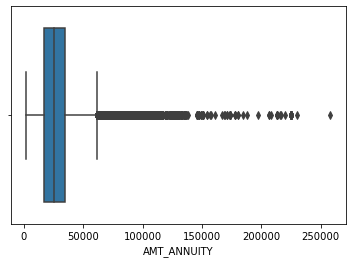

Boxplot of AMT_INCOME_TOTAL


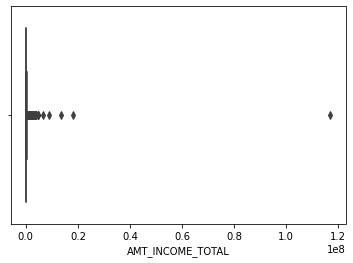

Boxplot of AMT_CREDIT


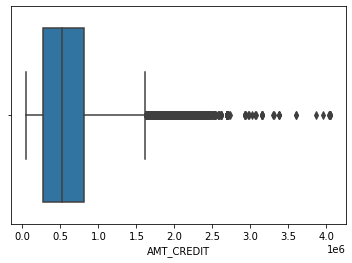

Boxplot of AMT_GOODS_PRICE


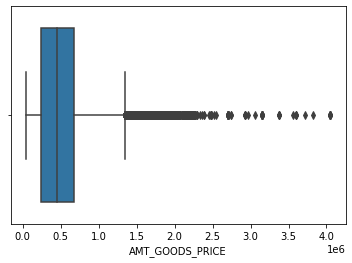

Boxplot of YEARS_EMPLOYED


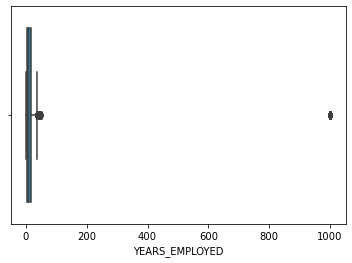

Boxplot of CNT_CHILDREN


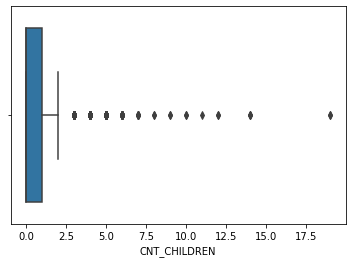

Boxplot of YEARS_BIRTH


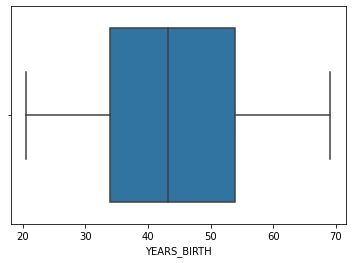

In [157]:
for i in cols_for_outlier_analysis:
    print("Boxplot of",i)
    sns.boxplot(appdata1[i])
    plt.show()

In [159]:
# Following have outliers: AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN
# There are huge outliers in AMT_INCOME_TOTAL indicating that there are people with extremely high income as compared to the others.
# YEARS_EMPLOYED has outlier values such as 1000 YEARS which is not natural. This may be because of incorrect entry or some other problems while capturing the data.
# CNT_CHILDREN indicates values beyond 15 which again seems to be not natural. It means having more than 15 children.
# Of all the plots DAYS_BIRTH has no outliers which means the data is good.

### Imbalance Analysis

In [161]:
# As per the Hint given the Problem Statement II : How will you analyse the data in case of data imbalance? , Lets check for the data imbalance

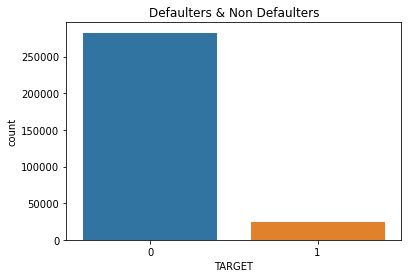

In [582]:
sns.countplot(appdata1['TARGET'])
plt.title('Defaulters & Non Defaulters')
plt.show()

In [165]:
appdata1['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [166]:
# There are 282,686 accounts that have done payment on time while rest 24,825 have defaulted.

In [168]:
appdata1['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [189]:
# 92% of the applicants have done payment on time and rest 8% have defaulted. This seems to be a practical scenario and there is no obvious problem in the data set at high level. 

In [169]:
# As per the Business Objectives mentioned in the Probalem Statement - I, 
# the case study should aim to identify the patterns which indicate if a client has difficulty in playing their installmanets. 
# This will help to a) decline loans for such high risk applicants and b) applicants capable of paying loans are not rejected.

# For this we will have to now create two data frames. 
# One to understand the patterns of the defaulters and the other data frame for non-defaulters. 

In [170]:
# create a data frame for target = 0 and name it as non_defaulters
non_defaulters = appdata1[appdata1['TARGET']==0]

In [171]:
# create a data frame for target = 1 and name it as defaulters
defaulters = appdata1[appdata1['TARGET']==1]

In [495]:
non_defaulters.shape

(282686, 59)

In [494]:
defaulters.shape

(24825, 59)

### Numeric Variable Analysis

#### Top 10 Correlations Analysis (defulaters and non_defaulters)

In [ ]:
# There some some columns that were converted into K (1000's).
# These varirables will create a false correlation
#those need to be dropped from both non_defaulters and defaulters data.

In [512]:
drop_cols_withK = ['AMT_CREDIT_K', 'AMT_INCOME_TOTAL_K']

In [515]:
non_defaulters.shape

(282686, 57)

In [519]:
defaulters.shape

(24825, 57)

In [ ]:
# Getting the top 10 correlation for the non-Defaulter data

Use itertools.combinations to get all unique correlations from pandas own correlation matrix .corr(), generate list of lists and feed it back into a DataFrame in order to use '.sort_values'. 
Set ascending = False to display highest correlations on top
corrank takes a DataFrame as argument because it requires .corr().
Now use both the dataframes = non_defaulters and defaulters

In [521]:
X = non_defaulters
def corrank(X: pd.DataFrame):
    import itertools
    df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    print(df.sort_values(by='corr',ascending=False))

corrank(X) # prints list of correlation pair (Max on top)

                                                 pairs      corr
40                       (AMT_CREDIT, AMT_GOODS_PRICE)  0.987022
23                     (CNT_CHILDREN, CNT_FAM_MEMBERS)  0.878571
50                      (AMT_ANNUITY, AMT_GOODS_PRICE)  0.776421
39                           (AMT_CREDIT, AMT_ANNUITY)  0.771297
77                       (YEARS_BIRTH, YEARS_EMPLOYED)  0.626114
28                     (AMT_INCOME_TOTAL, AMT_ANNUITY)  0.418948
29                 (AMT_INCOME_TOTAL, AMT_GOODS_PRICE)  0.349426
27                      (AMT_INCOME_TOTAL, AMT_CREDIT)  0.342799
78                   (YEARS_BIRTH, YEARS_REGISTRATION)  0.333151
85                  (YEARS_EMPLOYED, YEARS_ID_PUBLISH)  0.276663
79                     (YEARS_BIRTH, YEARS_ID_PUBLISH)  0.271314
84                (YEARS_EMPLOYED, YEARS_REGISTRATION)  0.214511
74          (REGION_POPULATION_RELATIVE, EXT_SOURCE_2)  0.198285
103            (EXT_SOURCE_2, YEARS_LAST_PHONE_CHANGE)  0.188129
82                       

In [ ]:
# Similarly Getting the top 10 correlation for the Defaulter data

In [522]:
X = defaulters
def corrank(X: pd.DataFrame):
    import itertools
    df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    print(df.sort_values(by='corr',ascending=False))

corrank(X) # prints list of correlation pair (Max on top)

                                                 pairs      corr
40                       (AMT_CREDIT, AMT_GOODS_PRICE)  0.982783
23                     (CNT_CHILDREN, CNT_FAM_MEMBERS)  0.885484
50                      (AMT_ANNUITY, AMT_GOODS_PRICE)  0.752295
39                           (AMT_CREDIT, AMT_ANNUITY)  0.752195
77                       (YEARS_BIRTH, YEARS_EMPLOYED)  0.582185
78                   (YEARS_BIRTH, YEARS_REGISTRATION)  0.289114
79                     (YEARS_BIRTH, YEARS_ID_PUBLISH)  0.252863
85                  (YEARS_EMPLOYED, YEARS_ID_PUBLISH)  0.229090
103            (EXT_SOURCE_2, YEARS_LAST_PHONE_CHANGE)  0.207071
84                (YEARS_EMPLOYED, YEARS_REGISTRATION)  0.192455
74          (REGION_POPULATION_RELATIVE, EXT_SOURCE_2)  0.169839
61                      (AMT_GOODS_PRICE, YEARS_BIRTH)  0.135738
42                           (AMT_CREDIT, YEARS_BIRTH)  0.135316
66                     (AMT_GOODS_PRICE, EXT_SOURCE_2)  0.130263
82                       

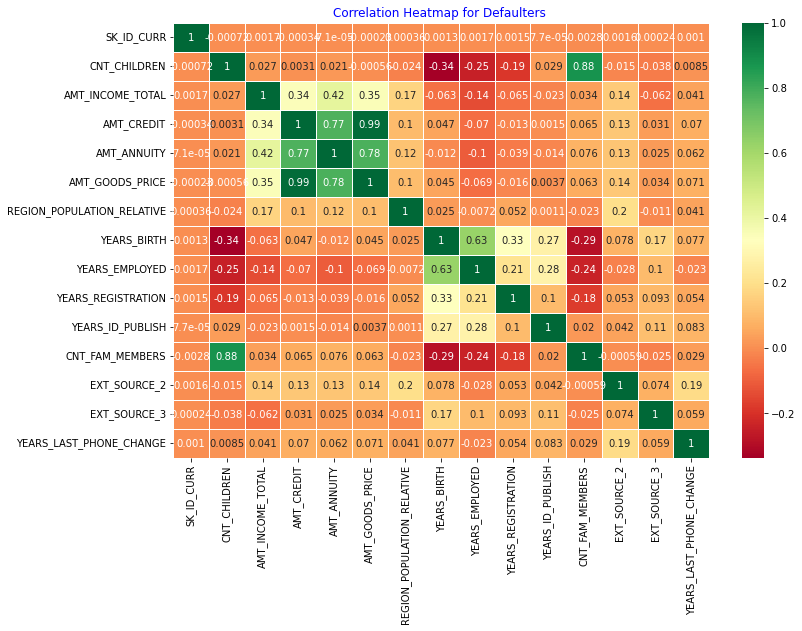

In [524]:
# lets do heatmap for defaulters

plt.figure(figsize=(12,8))
sns.heatmap(non_defaulters.corr(),cmap='RdYlGn',annot=True, linewidth=1)
plt.title('Correlation Heatmap for Defaulters ',color='blue')
plt.show()

In [525]:
#Insights from the Top10 correlation Analysis between the variables for defaulters and non defaulters
# Credit amount is highly correlated with amount of goods price which is same as non_defaulters.
# But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
# We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
# There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
# Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
# There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

### Univariate Analysis: Categorical Variables

#### NAME_CONTRACT_TYPE and CODE_GENDER

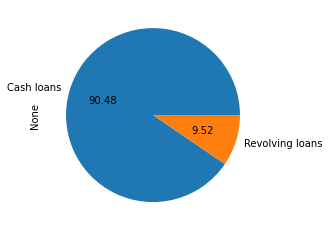

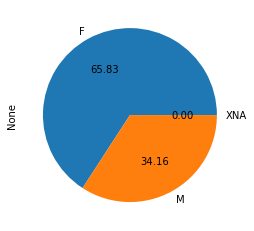

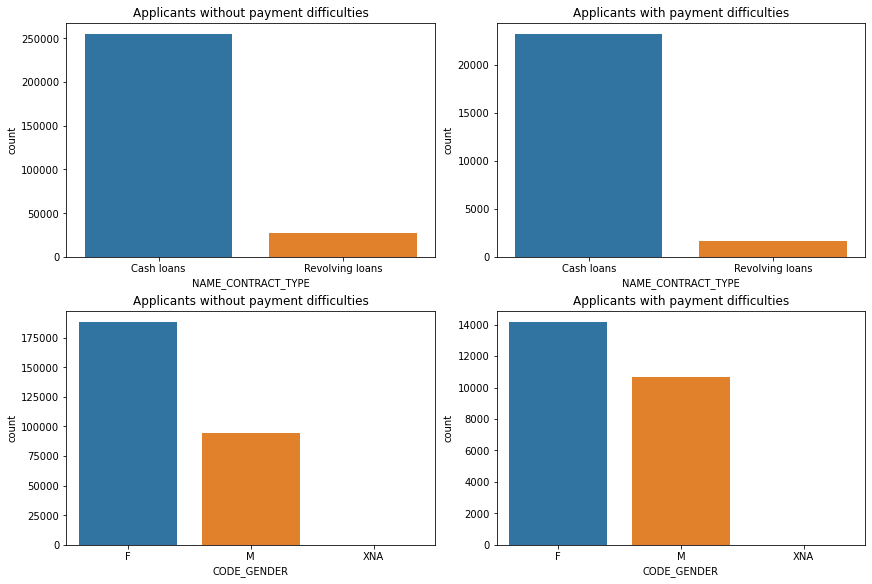

In [256]:
appdata1.groupby('NAME_CONTRACT_TYPE').size().plot(kind='pie', autopct='%.2f')
plt.show()
appdata1.groupby('CODE_GENDER').size().plot(kind='pie', autopct='%.2f')
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8), constrained_layout = True)

#create boxplot in each subplot
sns.countplot(non_defaulters['NAME_CONTRACT_TYPE'], ax=axes[0,0]).set(title='Applicants without payment difficulties')
sns.countplot(defaulters['NAME_CONTRACT_TYPE'], ax=axes[0,1]).set(title='Applicants with payment difficulties')


sns.countplot(non_defaulters['CODE_GENDER'], ax=axes[1,0]).set(title='Applicants without payment difficulties')
sns.countplot(defaulters['CODE_GENDER'], ax=axes[1,1]).set(title='Applicants with payment difficulties')

plt.show()

In [ ]:
# Insights for Contract Type: Revolving loans are 9.5% of total loans. Both defaulters and non defaulters take more cash loans than revolving loans
# Insights for Gender: Females take more loans than Males. There is some category called XNA, since it is small in count it can be ignored. 

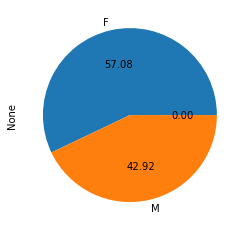

In [257]:
defaulters.groupby('CODE_GENDER').size().plot(kind='pie', autopct='%.2f')
plt.show()

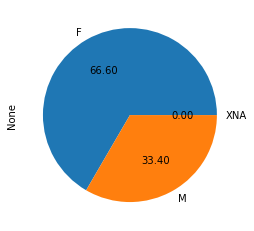

In [258]:
non_defaulters.groupby('CODE_GENDER').size().plot(kind='pie', autopct='%.2f')
plt.show()

In [259]:
# Insights: Males are defaulting more than females

#### FLAG_OWN_CAR and FLAG_OWN_REALTY

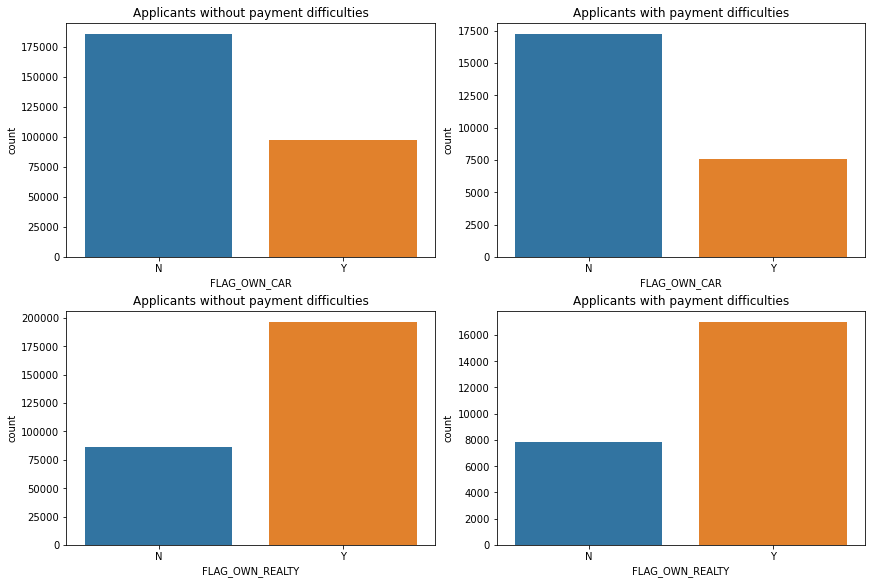

In [266]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8), constrained_layout = True)

#create boxplot in each subplot
sns.countplot(non_defaulters['FLAG_OWN_CAR'], ax=axes[0,0]).set(title='Applicants without payment difficulties')
sns.countplot(defaulters['FLAG_OWN_CAR'], ax=axes[0,1]).set(title='Applicants with payment difficulties')


sns.countplot(non_defaulters['FLAG_OWN_REALTY'], ax=axes[1,0]).set(title='Applicants without payment difficulties')
sns.countplot(defaulters['FLAG_OWN_REALTY'], ax=axes[1,1]).set(title='Applicants with payment difficulties')

plt.show()

In [ ]:
#insights FLAG_OWN_CAR: owning a car and defaulting has no correlation since looks like the percentages are same in both plots
# insights FLAG_OWN_REALTY: Owning reality and defaulting has no correlation (same as about insight)

#### CNT_CHILDREN

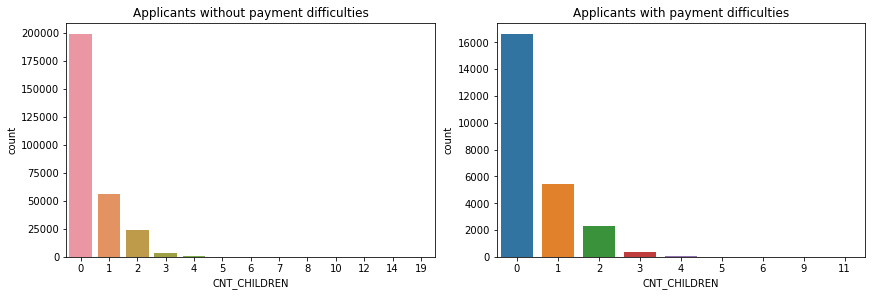

In [278]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4), constrained_layout = True)

#create boxplot in each subplot
sns.countplot(non_defaulters['CNT_CHILDREN'], ax=axes[0]).set(title='Applicants without payment difficulties')
sns.countplot(defaulters['CNT_CHILDREN'], ax=axes[1]).set(title='Applicants with payment difficulties')


plt.show()

In [ ]:
#insights on CNT_CHILDREN: most of the applicants do not have children. Very few have more than 3 children. 
# Applicants with zero to two children tend to repay the loans. Rest all may be risky.

#### NAME_HOUSING_TYPE

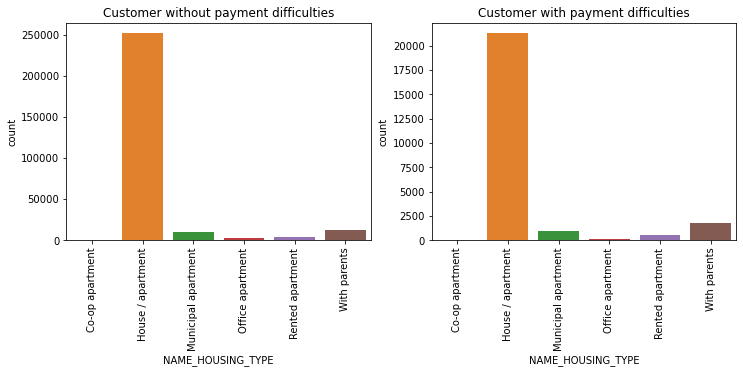

In [311]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['NAME_HOUSING_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [312]:
# Insights: Majority of the applicants live in house/apartment. People living with parents are more likely to face payment difficulties

#### NAME_FAMILY_STATUS

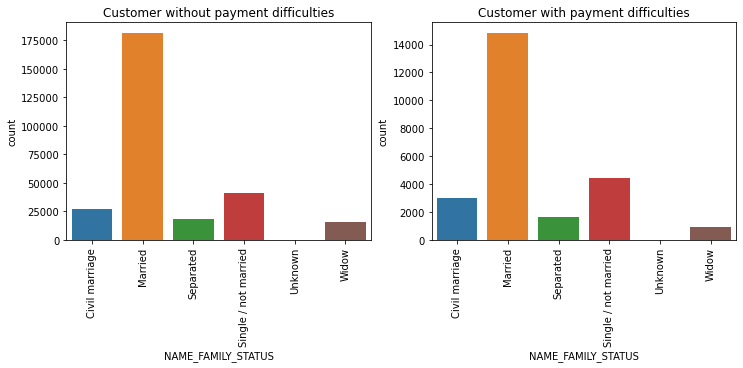

In [313]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['NAME_FAMILY_STATUS'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['NAME_FAMILY_STATUS'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

#### NAME_EDUCATION_TYPE

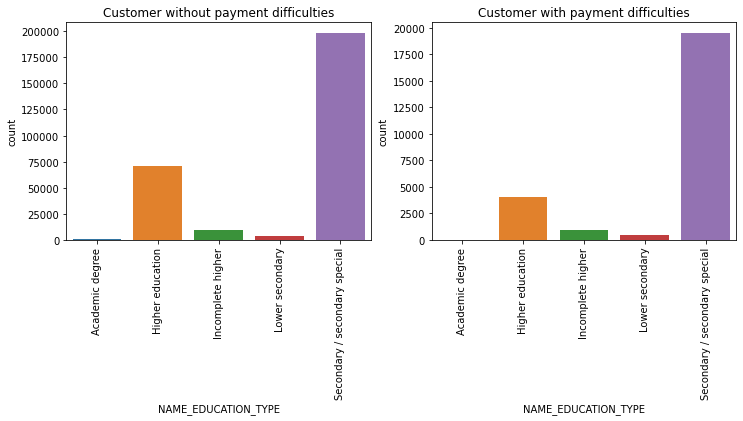

In [327]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['NAME_EDUCATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [ ]:
#insights: majority of the applicants are having secondary/secondary special education followed by higher education. 

#### NAME_INCOME_TYPE

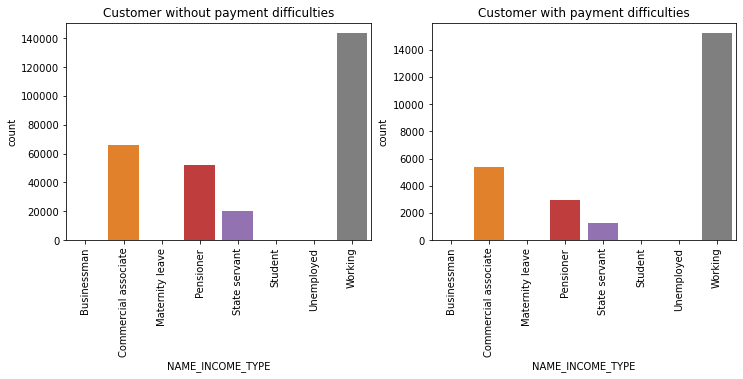

In [332]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['NAME_INCOME_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [333]:
#insights NAME_INCOME_TYPE: Most of the applicants are working. 

#### REGION_RATING_CLIENT

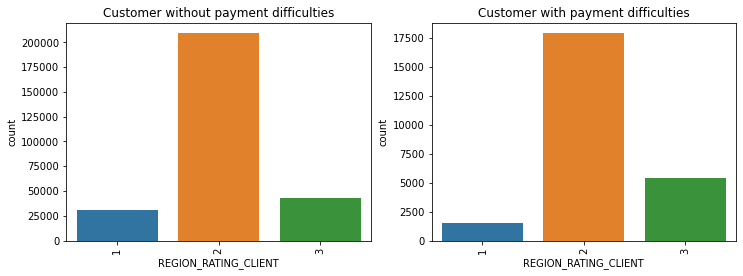

In [334]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['REGION_RATING_CLIENT'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['REGION_RATING_CLIENT'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [335]:
# Insights REGION_RATING_CLIENT: most of the applicants are located in region rating 2. Region rating 3 is having higher defaulters.
# Region rating 1 are having lowest defaulters and hence are safest to give loans

#### OCCUPATION_TYPE

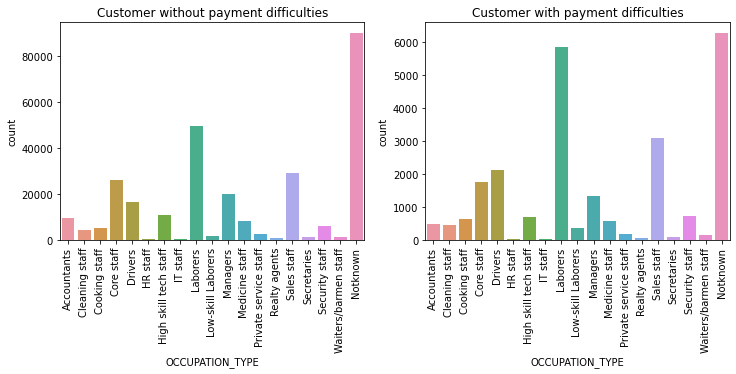

In [336]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['OCCUPATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [337]:
# Insights OCCUPATION_TYPE: most of the loan applicants are laborers followed by sales staff. Majority of the defaulters are from low skilled laborers. 

#### ORGANIZATION_TYPE

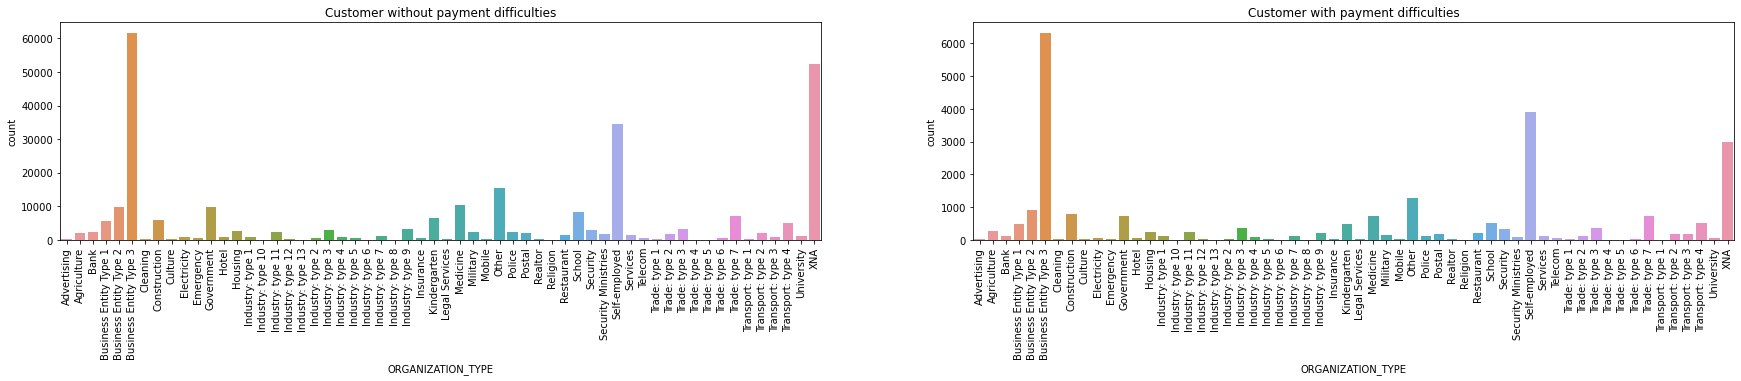

In [348]:
plt.figure(figsize=(30,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['ORGANIZATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['ORGANIZATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [349]:
#insights ORGANIZATION_TYPE: Business Entity Type 3 are the majority loan applicants. 

#### BIRTH_GROUP

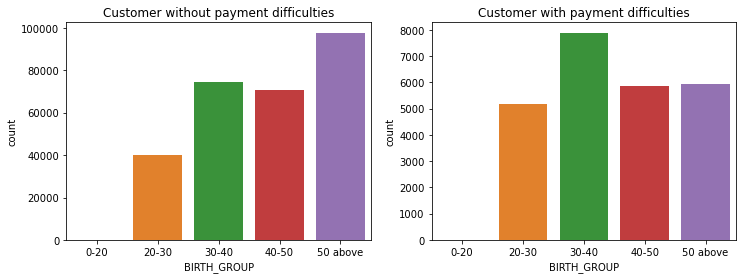

In [352]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['BIRTH_GROUP'])
plt.title('Customer without payment difficulties')
# plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['BIRTH_GROUP'])
# plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [583]:
# inights BIRTH_GROUP : Majority of applicants is residing in middle age (30 to 50 years)
# Age group of 20-40 are having higher likelyhood of defaulting
# Where as above age of 50 have less likelyhood of defaulting

#### EMPLOYMENT_GROUP

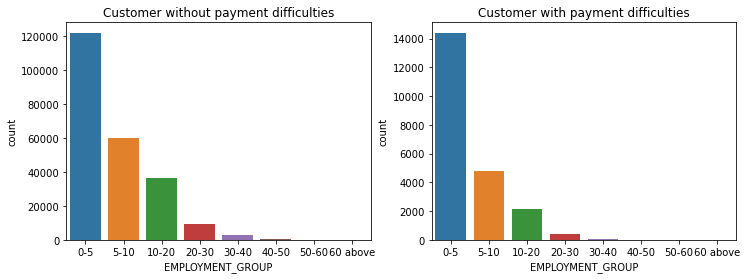

In [354]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['EMPLOYMENT_GROUP'])
plt.title('Customer without payment difficulties')
# plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['EMPLOYMENT_GROUP'])
# plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [355]:
# insights EMPLOYMENT_GROUP: Majority of the applicants are employed between 0-5 years. Defaulting decreases as the years of employment increases. 

#### AMT_CREDIT_GROUP

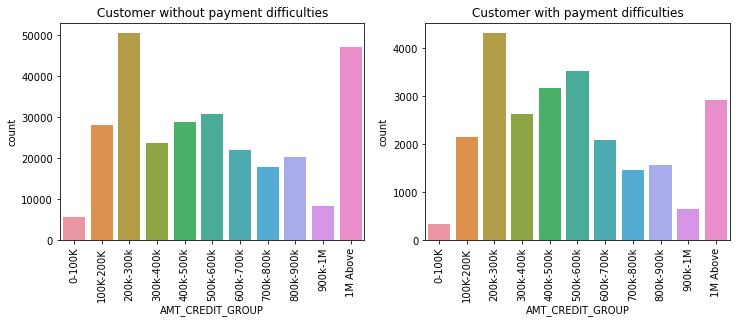

In [357]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['AMT_CREDIT_GROUP'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['AMT_CREDIT_GROUP'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [358]:
# insights AMT_CREDIT_GROUP: applicants who get loan between 300K to 600K are the majority of the defaulters

#### AMT_INCOME_GROUP

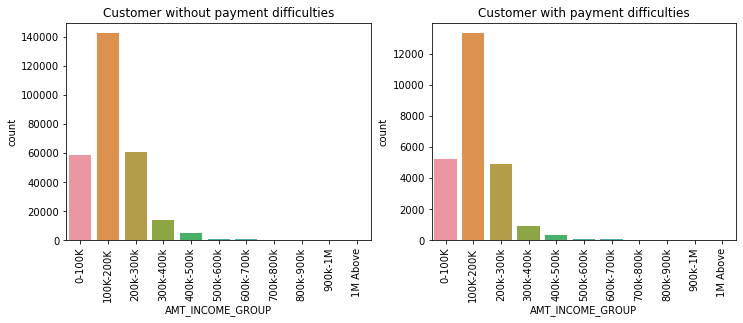

In [360]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['AMT_INCOME_GROUP'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['AMT_INCOME_GROUP'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [361]:
# insights AMT_INCOME_GROUP: Majority of the applicants have income less than 200K. Appplicants more than 700K are less likely to default.
# where as applicants with less than 300K are highly likely to default.

#### CNT_FAM_MEMBERS

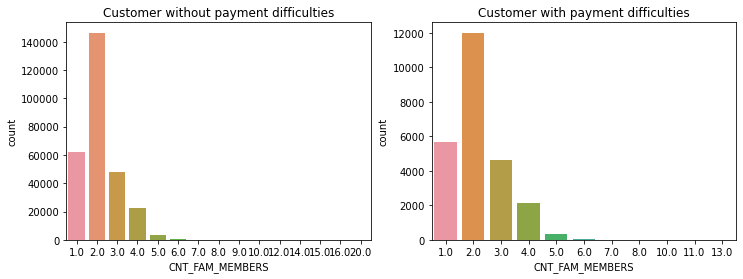

In [362]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(non_defaulters['CNT_FAM_MEMBERS'])
plt.title('Customer without payment difficulties')
#plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(defaulters['CNT_FAM_MEMBERS'])
#plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

In [363]:
#insights CNT_FAM_MEMBERS: More family members, greater than 3 means more likely to default. 

## Bivariate/Multivariate Analysis

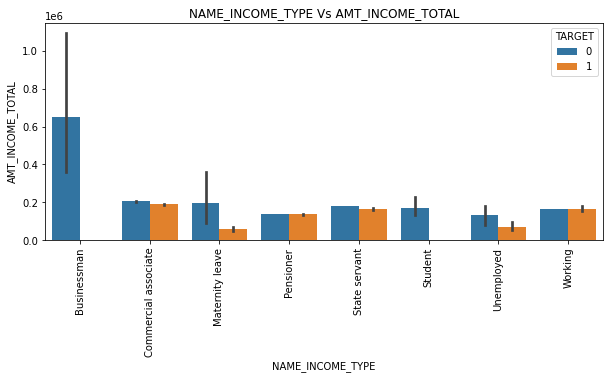

In [550]:
# Income type vs Income Amount Range
plt.figure(figsize=(10,4))
nit_ait = sns.barplot(x='NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL', data = appdata1, hue='TARGET')
plt.title('NAME_INCOME_TYPE Vs AMT_INCOME_TOTAL')
plt.xticks(rotation=90)
plt.show()

In [551]:
#insights: Businessman income is the highest and the estimated range shows that the income of a business man could be in between 4 lakhs and slightly above 10 lakhs

#### Bivariate Analysis for Numerical to Numerical type variables

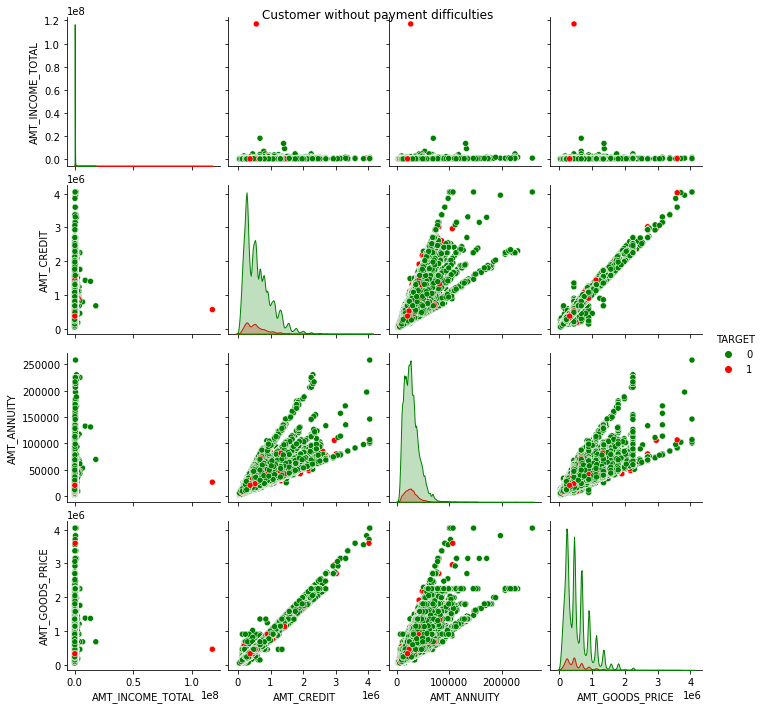

In [580]:
pp_cols = appdata1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
pp_non_def = sns.pairplot(pp_cols,hue='TARGET', palette=['g','r'])
pp_non_def.fig.suptitle("Customer without payment difficulties")
plt.show()

In [581]:
# Insights: AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE are all positively correlated to each other. 
# There are very less defaulters for AMT_CREDIT >3M

#### Bivariate Analysis for Categorical to Categorical type variables

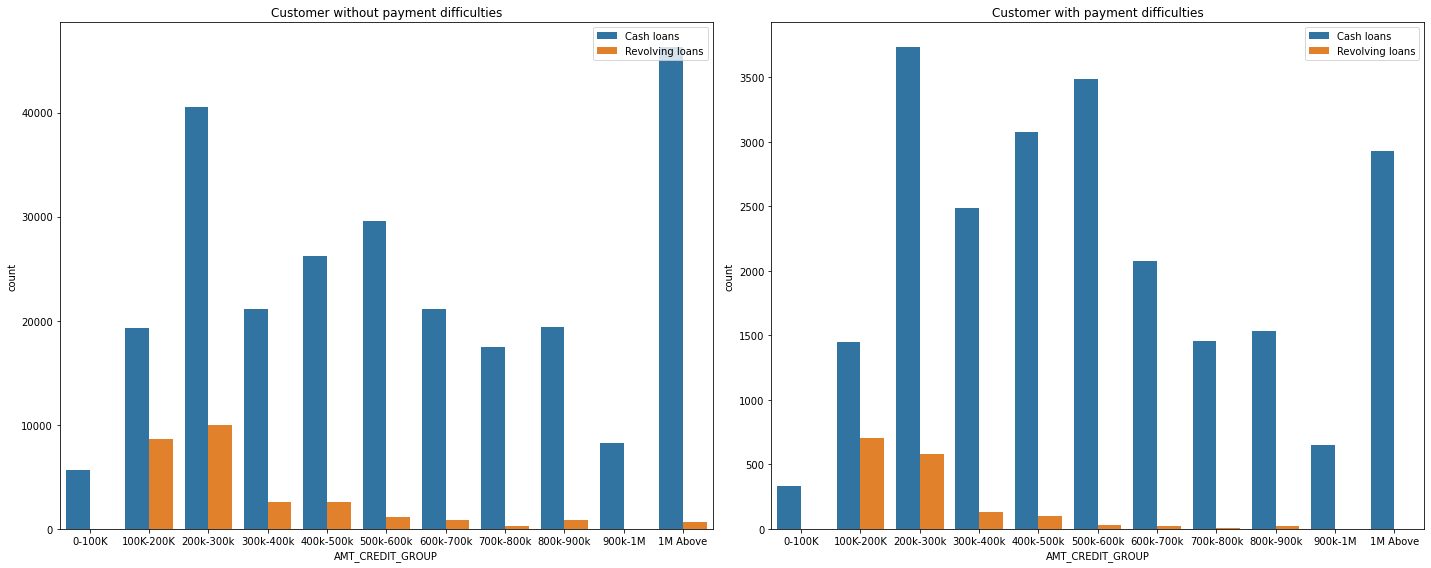

In [392]:
#bivariate analysis on NAME_CONTRACT_TYPE and AMT_CREDIT_GROUP

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x='AMT_CREDIT_GROUP',hue='NAME_CONTRACT_TYPE')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x='AMT_CREDIT_GROUP',hue='NAME_CONTRACT_TYPE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [387]:
# insights Applicants with revolving loans and having credit between 100K and 300k have max risk of defaulting.

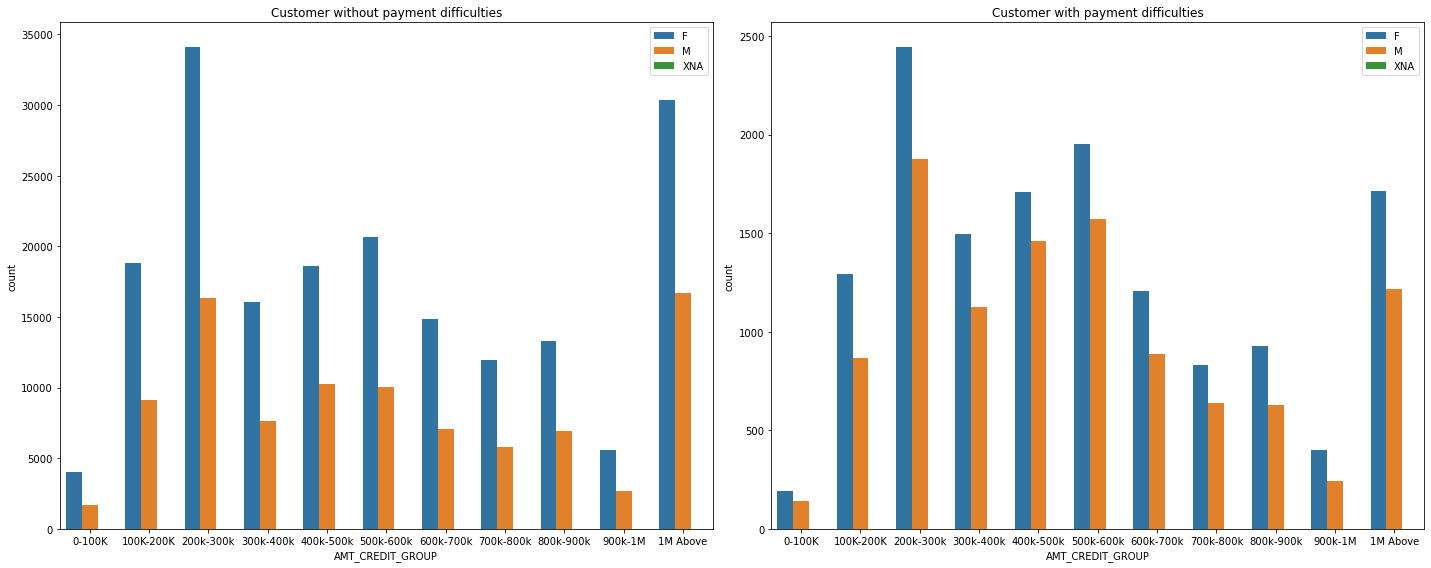

In [391]:
#bivariate analysis on CODE_GENDER and AMT_CREDIT_GROUP

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x='AMT_CREDIT_GROUP',hue='CODE_GENDER')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x='AMT_CREDIT_GROUP',hue='CODE_GENDER')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [394]:
# insights: male applicants who get credit between 300K to 600K are the majority of the defaulters

#### Bivariate Analysis for Numerical to Categorical type variables

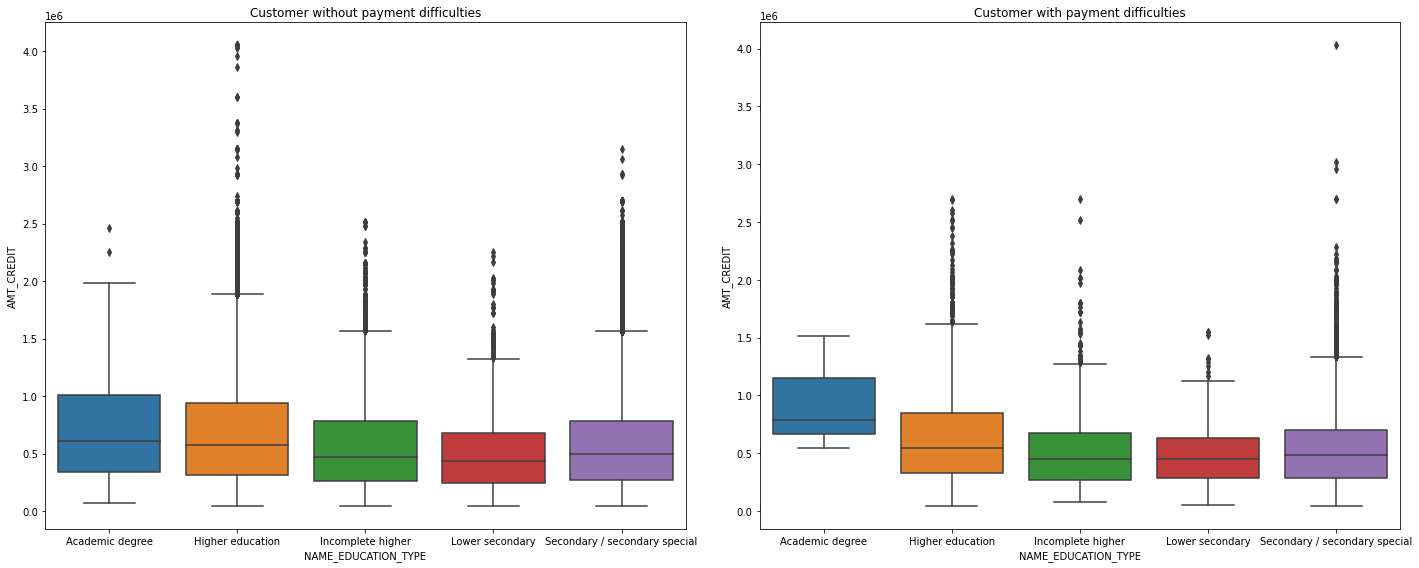

In [399]:
#bivariate analysis on AMT_CREDIT and NAME_EDUCATION_TYPE

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=non_defaulters,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(data=defaulters,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

### Numerical Univariate Analysis

In [552]:
# Plotting the numerical columns related to amount as distribution plot
nua = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

Defaulters Boxplot of AMT_INCOME_TOTAL


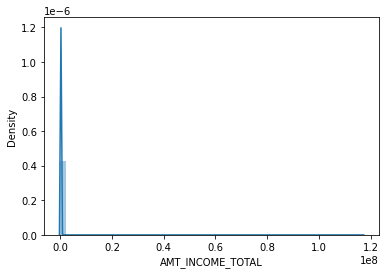

Defaulters Boxplot of AMT_CREDIT


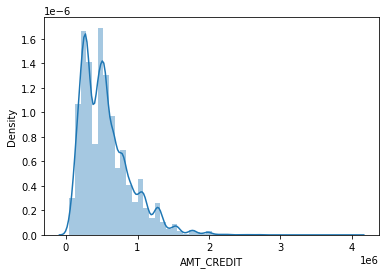

Defaulters Boxplot of AMT_ANNUITY


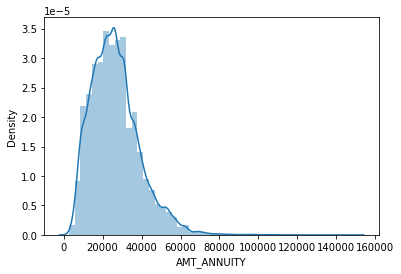

Defaulters Boxplot of AMT_GOODS_PRICE


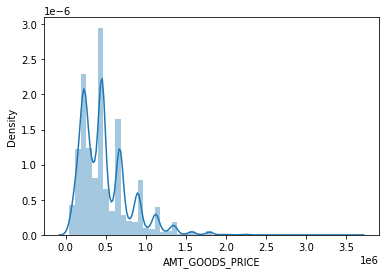

In [564]:
for i in nua:
    print("Defaulters Boxplot of",i)
    sns.distplot(defaulters[i])
    plt.show()

Non Defaulters Boxplot of AMT_INCOME_TOTAL


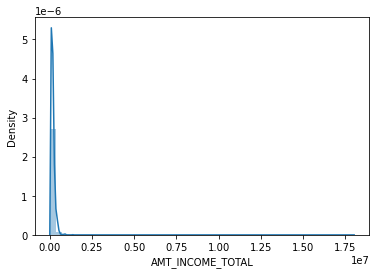

Non Defaulters Boxplot of AMT_CREDIT


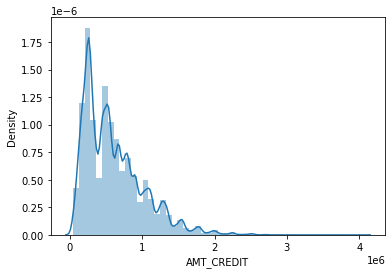

Non Defaulters Boxplot of AMT_ANNUITY


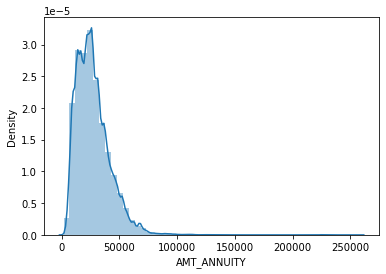

Non Defaulters Boxplot of AMT_GOODS_PRICE


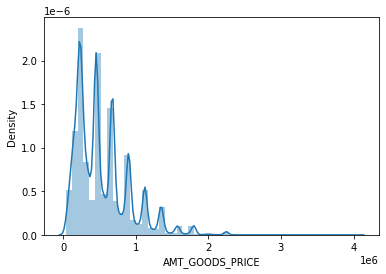

In [563]:
for i in nua:
    print("Non Defaulters Boxplot of",i)
    sns.distplot(non_defaulters[i])
    plt.show()

In [565]:
# Inisghts: The distribution of both defaulters and non defaulters is same in all the plots and 
# hence we cannot use any of these variables in isolation to make a decision.
# Most loans are given for goods price below 10 lakhs
# Many applicants have annuity below 50000
# Credit amount of the loan is mostly less then 10 lakhs

### Numerical Bivariate Analysis

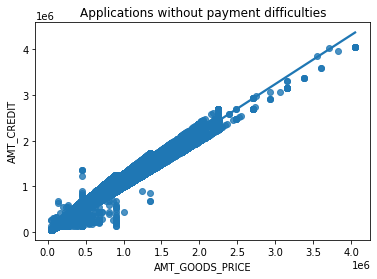

In [574]:
# Checking the relationship between Goods price and credit for non defaulters
sns.regplot(non_defaulters['AMT_GOODS_PRICE'],non_defaulters['AMT_CREDIT'])
plt.title('Applications without payment difficulties')
plt.show()

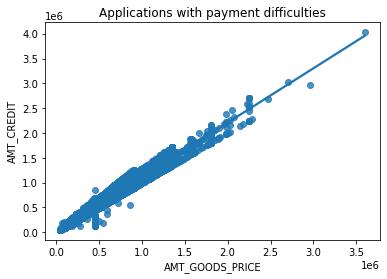

In [575]:
# Checking the relationship between Goods price and credit for defaulters
sns.regplot(defaulters['AMT_GOODS_PRICE'],defaulters['AMT_CREDIT'])
plt.title('Applications with payment difficulties')
plt.show()

In [576]:
#insights: when the credit amount goes more than 3 there is likelyhood of defaulting

## PREV DATA Missing Values

In [406]:
prevapp.shape

(1670214, 37)

In [407]:
prevapp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [408]:
prevapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [405]:
prevapp.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [409]:
#calculate the percentage of missing values in prevapp data
missing_values_percent_prev = (prevapp.isnull().sum()/len(prevapp)*100).sort_values(ascending=False)
missing_values_percent_prev

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [410]:
cols_top_drop_prev =  missing_values_percent_prev[missing_values_percent_prev >= 40]
cols_top_drop_prev

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
dtype: float64

In [411]:
prevapp1 = prevapp.drop(columns=cols_top_drop_prev.index)

In [413]:
prevapp1.shape

(1670214, 26)

In [414]:
# 11 columns with >40% missing values from prevapp dataset have been dropped

In [415]:
missing_values_percent_prev1 = (prevapp1.isnull().sum()/len(prevapp1)*100).sort_values(ascending=False)
missing_values_percent_prev1 

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [416]:
prevapp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [ ]:
# Following are continuous variables: AMT_GOODS_PRICE, AMT_ANNUITY, CNT_PAYMENT
# They will be imputed based on following analysis:
# Mean - preferred if data is numeric and not skewed.
# Median - preferred if data is numeric and skewed.
# Mode - preferred if the data is a string(object) or numeric.

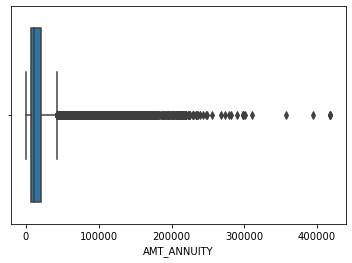

In [417]:
sns.boxplot(prevapp1['AMT_ANNUITY'])
plt.show()

In [419]:
# Data is numeric, highly skewed and there are lot of outliers hence using median will be right approach.

In [422]:
prevapp1['AMT_ANNUITY'].fillna(prevapp1['AMT_ANNUITY'].median(),inplace = True)

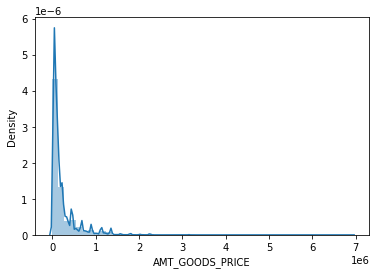

In [424]:
sns.distplot(prevapp1['AMT_GOODS_PRICE'][pd.notnull(prevapp1['AMT_GOODS_PRICE'])])
plt.show()

In [427]:
# distribution shows its skwed (hence mean is not preferred and median might be preferred)
# but there are multiple peaks too, hence mode might be a better choice to impute

In [428]:
prevapp1['AMT_GOODS_PRICE'].fillna(prevapp1['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [435]:
prevapp1['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [438]:
# lets look at CNT_PAYMENT which has nulls wih NAME_CONTRACT_STATUS
prevapp1.loc[prevapp1['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [ ]:
# We can impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were non approved

In [439]:
prevapp1['CNT_PAYMENT'].fillna(0,inplace = True)

In [440]:
# lets check again for missing values in prevapp dataset
missing_values_percent_prev1 = (prevapp1.isnull().sum()/len(prevapp1)*100).sort_values(ascending=False)
missing_values_percent_prev1 

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000


In [441]:
# missing values for PRODUCT_COMBINATION is extremely less, hence we can ignore it

In [446]:
prevapp1.shape

(1670214, 26)

In [448]:
# Delete columns not required by consulting the data dictionary
no_use_cols_prev = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [449]:
prevapp1.drop(no_use_cols_prev,axis=1, inplace=True)

In [450]:
prevapp1.shape

(1670214, 22)

## Setting the Data Types for PREV DATA

In [451]:
## Check the number of unique values each column to identify and sort categorical columns
cols_unique_values_prev = pd.DataFrame(prevapp1.nunique()).reset_index()
cols_unique_values_prev.columns = ['Column','No. of Unique Values']

## get the unique values in each column
cols_unique_values_prev['Unique Values'] = cols_unique_values_prev['Column'].apply(lambda x: prevapp1[x].unique())
cols_unique_values_prev.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
15,NAME_PRODUCT_TYPE,3,"[XNA, x-sell, walk-in]"
10,NAME_PAYMENT_TYPE,4,"[Cash through the bank, XNA, Non-cash from you..."
2,NAME_CONTRACT_TYPE,4,"[Consumer loans, Cash loans, Revolving loans, ..."
12,NAME_CLIENT_TYPE,4,"[Repeater, New, Refreshed, XNA]"
8,NAME_CONTRACT_STATUS,4,"[Approved, Refused, Canceled, Unused offer]"
14,NAME_PORTFOLIO,5,"[POS, Cash, XNA, Cards, Cars]"
20,NAME_YIELD_GROUP,5,"[middle, low_action, high, low_normal, XNA]"
16,CHANNEL_TYPE,8,"[Country-wide, Contact center, Credit and cash..."
11,CODE_REJECT_REASON,9,"[XAP, HC, LIMIT, CLIENT, SCOFR, SCO, XNA, VERI..."
18,NAME_SELLER_INDUSTRY,11,"[Connectivity, XNA, Consumer electronics, Indu..."


In [452]:
prevapp1.nunique().sort_values(ascending=True)

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [453]:
prevapp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1670214 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1670214 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [457]:
# Data type will be changed to categorical for following columns
cols_cat_change_prev = ['NAME_PRODUCT_TYPE', 'NAME_PAYMENT_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_PORTFOLIO', 'NAME_YIELD_GROUP', 'CHANNEL_TYPE', 'CODE_REJECT_REASON', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION', 'NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY']

In [458]:
for i in cols_cat_change_prev:
    prevapp1[i] = prevapp1[i].astype('category')

In [459]:
prevapp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

In [460]:
# Values in DAYS_DECISION is in negative values. So converting them into positive 
prevapp1['DAYS_DECISION'] = prevapp1['DAYS_DECISION'].abs()

In [463]:
# check if the negative values have been converted to positive for DAYS_DECISION
prevapp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [464]:
#Creating buckets for DAYS_DECISION,this will help is easier analysis when this variable is used.
prevapp1['DAYS_DECISION_GROUP'] = (prevapp1['DAYS_DECISION']-(prevapp1['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((prevapp1['DAYS_DECISION'] - (prevapp1['DAYS_DECISION'] % 400)) + (prevapp1['DAYS_DECISION'] % 400) + (400 - (prevapp1['DAYS_DECISION'] % 400))).astype(str)

In [465]:
# Lets check how the data looks now
prevapp1['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

In [466]:
# Inisght DAYS_DECISION_GROUP: 37% of applicants have applied for a new loan within appx one year of prev loan decision

In [467]:
prevapp1['DAYS_DECISION_GROUP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1670214 entries, 0 to 1670213
Series name: DAYS_DECISION_GROUP
Non-Null Count    Dtype 
--------------    ----- 
1670214 non-null  object
dtypes: object(1)
memory usage: 12.7+ MB


In [468]:
# Convert the DAYS_DECISION_GROUP into category for easier analysis
prevapp1['DAYS_DECISION_GROUP'] = prevapp1['DAYS_DECISION_GROUP'].astype('category')

In [470]:
# check if dtype has been changed to category
prevapp1['DAYS_DECISION_GROUP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1670214 entries, 0 to 1670213
Series name: DAYS_DECISION_GROUP
Non-Null Count    Dtype   
--------------    -----   
1670214 non-null  category
dtypes: category(1)
memory usage: 1.6 MB


### Outlier Analysis for PREV DATA

Boxplot of AMT_ANNUITY


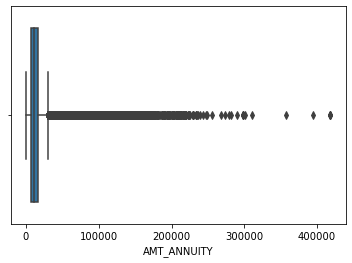

Boxplot of AMT_APPLICATION


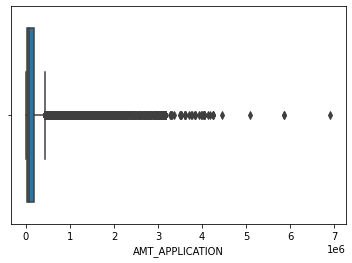

Boxplot of AMT_CREDIT


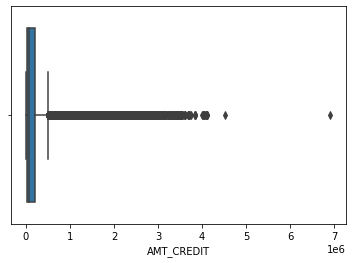

Boxplot of AMT_GOODS_PRICE


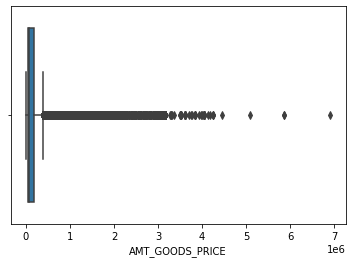

Boxplot of SELLERPLACE_AREA


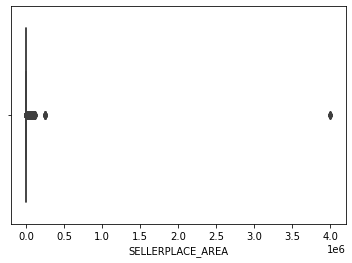

Boxplot of SK_ID_CURR


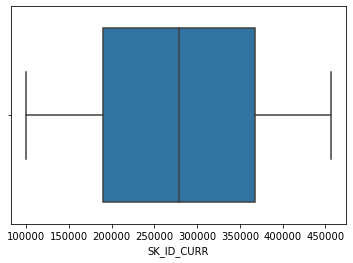

Boxplot of DAYS_DECISION


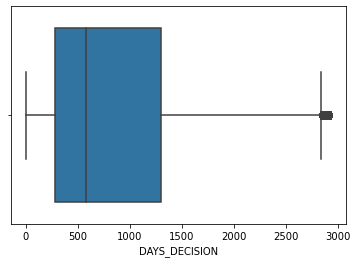

Boxplot of CNT_PAYMENT


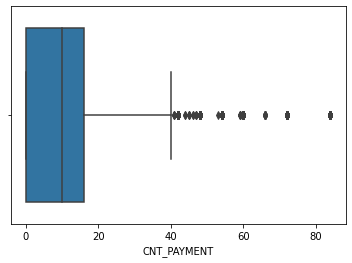

In [471]:
# Selecting variables and runnin the code to check outliers
cols_for_outlier_analysis_prev = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']

for i in cols_for_outlier_analysis_prev:
    print("Boxplot of",i)
    sns.boxplot(prevapp1[i])
    plt.show()


In [472]:
# Insights from PREV DATA outlier analysis:
# Following variable have large amount of outliers: AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA
# Following variable has few outliers: DAYS_DECISION
# Following variable has less outliers: CNT_PAYMENT
# No outliers for SK_ID_CURR which is just an ID column type

## Merged Data Frame Analysis

In [473]:
# Both the data sets appdata1 and prevapp1 to be merged on SK_ID_CURR using Inner Join method
mergeddata = pd.merge(appdata1, prevapp1, how='inner', on='SK_ID_CURR')
mergeddata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BIRTH_GROUP,EMPLOYMENT_GROUP,AMT_INCOME_TOTAL_K,AMT_CREDIT_K,AMT_INCOME_GROUP,AMT_CREDIT_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0.0,0.0,0.0,0.0,0.0,1.0,20-30,0-5,2.025,4.065975,200k-300k,400k-500k,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-5,2.700,12.935025,200k-300k,1M Above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-5,2.700,12.935025,200k-300k,1M Above,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-5,2.700,12.935025,200k-300k,1M Above,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0

In [474]:
# Check the shape
mergeddata.shape

(1413701, 81)

In [475]:
# Check the column info
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 81 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  category
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413701 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [476]:
# check the mergeddata stats
mergeddata.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL_K,AMT_CREDIT_K,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,4.048933e-01,1.733160e+05,5.875537e+05,2.701688e+04,5.276522e+05,2.074985e-02,4.471521e+01,1.990780e+02,1.370749e+01,8.313872e+00,2.150501e+00,5.114978e-01,4.974956e-01,2.971783e+00,1.733160e+00,5.875537e+00,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,7.173454e-01,1.985734e+05,3.849173e+05,1.395072e+04,3.531028e+05,1.334702e-02,1.190290e+01,3.927051e+02,9.728907e+00,4.129798e+00,9.006787e-01,1.910056e-01,1.797586e-01,2.191608e+00,1.985734e+00,3.849173e+00,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.881244e+05,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,2.051781e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.173617e-08,5.272652e-04,0.000000e+00,2.565000e-01,4.500000e-01,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,3.490137e+01,2.854795e+00,5.482192e+00,4.884932e+00,2.000000e+00,3.893855e-01,3.807997e-01,1.084932e+00,1.125000e+00,2.700000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,4.500000e+04,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,4.395616e+01,6.578082e+00,1.235068e+01,9.123288e+00,2.000000e+00,5.630477e-01,5.352763e-01,2.769863e+00,1.575000e+00,5.084955e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,7.087500e+04,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,5.473973e+01,1.729589e+01,2.057534e+01,1.183288e+01,3.000000e+00,6.605643e-01,6.212263e-01,4.610959e+00,2.070000e+00,8.079840e+00,2.384012e+06,1.674797e+04,1.800000e+05,2.156400e+05,1.800000e+05,1.313000e+03,8.500000e+01,1.800000e+01
max,4.562550e+05,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,6.904384e+01,1.000666e+03,6.759452e+01,1.971781e+01,2.000000e+01,8.549997e-01,8.960095e-01,1.175890e+01,1.170000e+03,4.050000e+01,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.922000e+03,4.000000e+06,8.400000e+01


In [477]:
# using the same approach for appdata1 , 
# we will categorize the mergeddata as per the TARGET variable 
# to get insights into applicants with payment difficulties (defaulters) and without payment difficulties (non_defaulters)

In [479]:
merged_non_defaulters = mergeddata[mergeddata['TARGET']==0] 
merged_defaulters = mergeddata[mergeddata['TARGET']==1] 

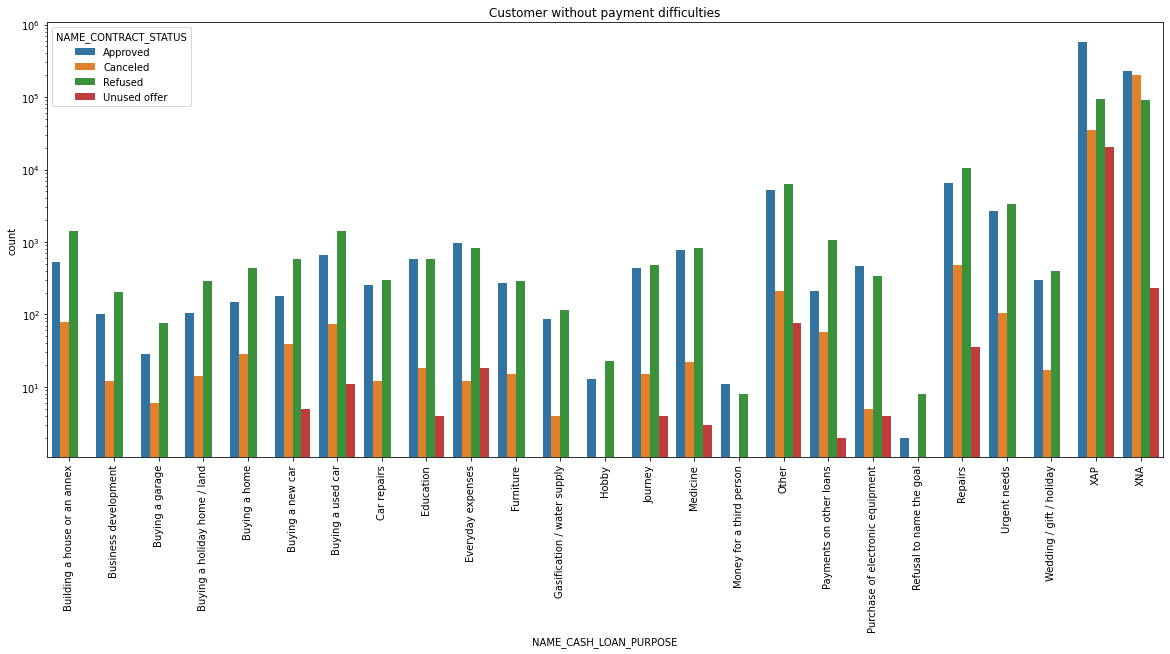

In [485]:
plt.figure(figsize=(20,8))
cp = sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data = merged_non_defaulters, hue='NAME_CONTRACT_STATUS')
plt.title('Customer without payment difficulties')
cp.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

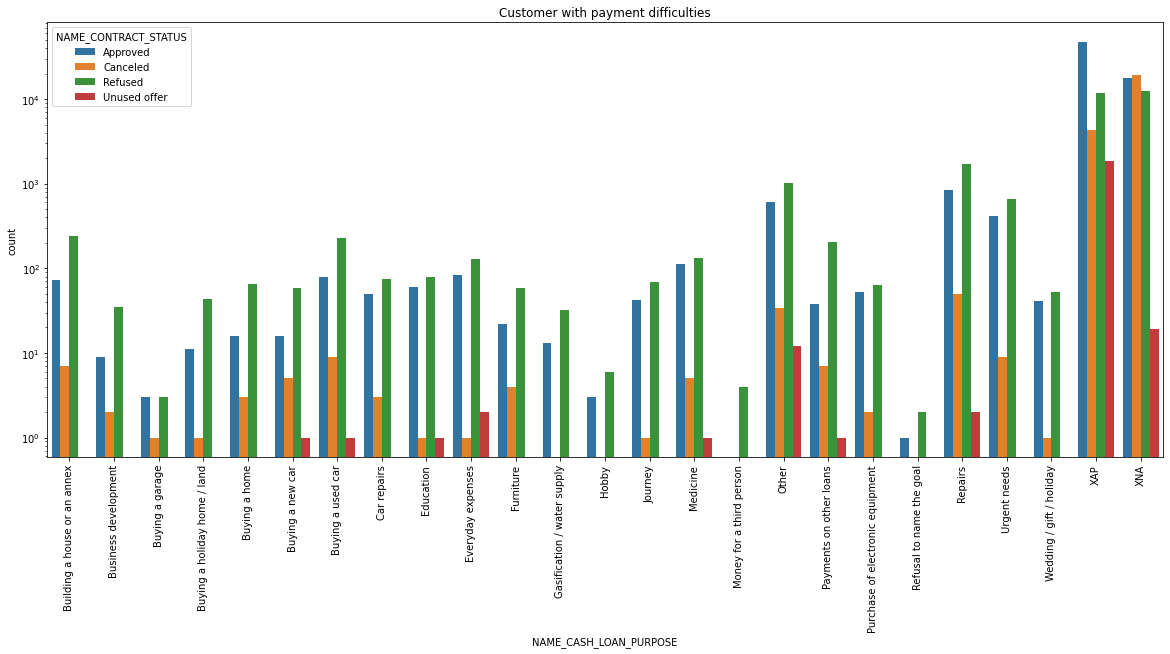

In [486]:
plt.figure(figsize=(20,8))
cp = sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data = merged_defaulters, hue='NAME_CONTRACT_STATUS')
plt.title('Customer with payment difficulties')
cp.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

In [487]:
#Insights: NAME_CASH_LOAN_PURPOSE has high number of values - XAP and XNA
# Loan taken for repairs, urgent need and others are having higest defaulters
# Whenever loan has been taken for repair and other work, the bank has rejected or the applicant has refused. 

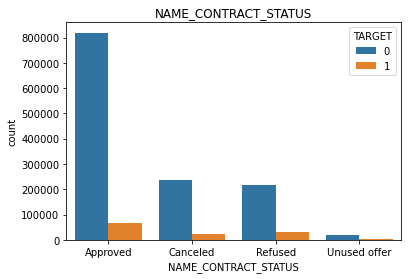

In [584]:
## Check the CONTRACT_STATUS vs loan repayment and whether there is any business loss or financial loss
sns.countplot(x='NAME_CONTRACT_STATUS', data = mergeddata, hue='TARGET')
plt.title('NAME_CONTRACT_STATUS')
plt.show()

In [490]:
#Insights: Majority of the prev cancelled applicants have repayed the loan.
# Lot of applicants who have been previously refused a loan have done a repayment in current case

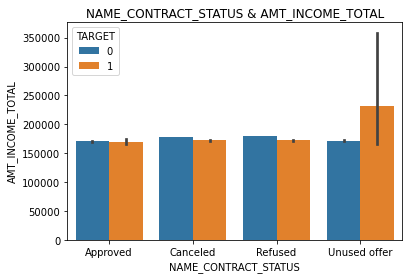

In [586]:
# checking total income and contract status
sns.barplot(data = mergeddata, x='NAME_CONTRACT_STATUS', y='AMT_INCOME_TOTAL', hue='TARGET')
plt.title('NAME_CONTRACT_STATUS & AMT_INCOME_TOTAL')
plt.show()

In [587]:
# Insights: applicants with higher income than others have defaulted with contract status - unused offer

## Recommendations

In [ ]:
Gender: Females are less likely to default and generally men are high risk, especially who get credit between 300K to 600K
Family: Applicants with few children tend to pay back loans
Age: Applicants above age of 50 are safest while age group of 20-40 is high risk
Credit Amount: People (both male and females) who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.
Loan Purpose: Loan taken for repairs, urgent need and others are having highest defaulters
Contract Status: 
Majority of the prev cancelled applicants have repayed the loan.
Lot of people are cancelling or leaving their offers unused. This needs further investigation